In [1]:
using Pkg; Pkg.activate("../../dev")

  Activating environment at `~/werk/code/julia/packages/dev/Project.toml`


In [2]:
using BasisFunctions, FrameFun, Plots, DomainSets
FE = FrameFun;BA = BasisFunctions;

# 1D Differential Equation (Poisson)

In [3]:
B = Fourier(41) → -1..1
Dom = -0.5..0.5

-0.5..0.5

## Homogenous Dirichlet Boundary Condition


$$\begin{align}p''(x)&=f(x), &x\in\Omega\\ p(x)&= 0, &x \in \delta\Omega\end{align}$$

Boundary conditions are defined by an operator and a function. The solution F satisfies 
    diff*F = df
on the domain boundary.

In [4]:
diff = IdentityOperator(B)
BC = DirichletBC(x->0);

Differential equations are defined by an operator, a function and a boundary condition. The solution F satisfies 
    Diff*F=f
in the interior of the domain.

In [5]:
fD = x->x;
Diff = differentiation(B)*differentiation(B)
DE = DiffEquation(B,Dom,Diff,fD, (BC,BC));

In [6]:
FD = solve(DE)

A 1-dimensional Expansion with 41 degrees of freedom.
Basis: ExtensionFrame{Float64, ComplexF64, BasisFunctions.MappedFourier{Float64}, ClosedInterval{Float64}}(-0.5..0.5, BasisFunctions.MappedFourier{Float64}(Fourier(41), x -> 2.0 * x - 1.0))


In [7]:
# Exact solution
solD = x->x^3/6 - x/24;

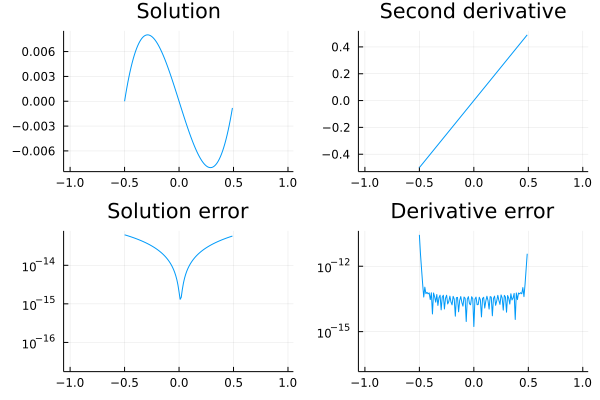

In [8]:
plot(FD,layout=4,title="Solution")
plot!(FD'',subplot=2,title="Second derivative")
plot!(FD,solD,subplot=3,title="Solution error")
plot!(FD'',fD,subplot=4,title="Derivative error")

## Homogenous Neumann Boundary Condition


$$\begin{align}p''(x)&=f(x), &x\in\Omega\\ p'(x)&= 0, &x \in \delta\Omega\end{align}$$

In [9]:
diff = differentiation(B)
NeumannBC(x->0.)

NeumannBC(var"#11#12"(), {x} (full space))

In [10]:
fN = x->x;
Diff = differentiation(B)*differentiation(B)
DE = DiffEquation(B,Dom,Diff,fN, (BC,));

In [11]:
FN = solve(DE)

A 1-dimensional Expansion with 41 degrees of freedom.
Basis: ExtensionFrame{Float64, ComplexF64, BasisFunctions.MappedFourier{Float64}, ClosedInterval{Float64}}(-0.5..0.5, BasisFunctions.MappedFourier{Float64}(Fourier(41), x -> 2.0 * x - 1.0))


In [12]:
# Exact solution
solN = x->x^3/6-x/8

#15 (generic function with 1 method)

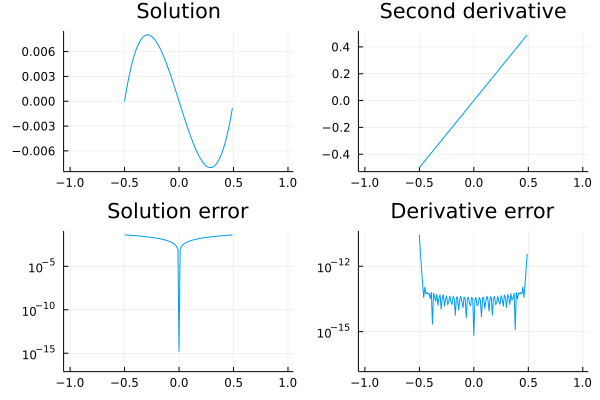

In [13]:
plot(FN,layout=4,title="Solution")
plot!(FN'',subplot=2,title="Second derivative")
plot!(FN,solN,subplot=3,title="Solution error")
plot!(FN'',fN,subplot=4,title="Derivative error")

# 2D Differential Equation 

2D experiments may take some time

## Dirichlet on Annulus (Laplace)

$$\begin{align}
\Delta p(x,y)&=0 &(x,y)\in\Omega\\
p(x,y) &= df(x,y) &(x,y)\in\delta\Omega
\end{align}$$

In [14]:
B2 = (Fourier(31) → -1..1)^2
D2 = disk(0.8)\cube([-0.15,-1.0],[0.15,0.0])

Ball(0.8, [0.0, 0.0]) \ ((-0.15..0.15) × (-1.0..0.0))

In [29]:
diff2 = IdentityOperator(B2)
df2D = (x,y) -> x-y;
BC2 = DirichletBC(df2D,DomainSets.euclideanspace(Val(2)))

DirichletBC(var"#29#30"(), {x} (full space), 1.0)

In [32]:
f2D = (x,y)->0;
Diff2 = differentiation(B2,(2,0))+differentiation(B2,(0,2))
DE2 = DiffEquation(B2,D2,Diff2,f2D, (BC2,));

In [33]:
F2D = solve(DE2,solverstyle=DirectStyle(),directsolver=:qr) 

A 2-dimensional Expansion with 1681 degrees of freedom.
Basis: ExtensionFrame{SVector{2, Float64}, ComplexF64, BasisFunctions.TupleProductDict{2, Tuple{BasisFunctions.MappedFourier{Float64}, BasisFunctions.MappedFourier{Float64}}, SVector{2, Float64}, ComplexF64}, SetdiffDomain{SVector{2, Float64}, Tuple{DomainSets.GenericBall{SVector{2, Float64}, :closed, Float64}, DomainSets.GenericBall{SVector{2, Float64}, :closed, Float64}}}}(Ball(0.75, [0.0, 0.0]) \ Ball(0.2, [0.3, -0.3]), (BasisFunctions.MappedFourier{Float64}(Fourier(41), x -> 2.0 * x - 1.0)) ⊗ (BasisFunctions.MappedFourier{Float64}(Fourier(41), x -> 2.0 * x - 1.0)))


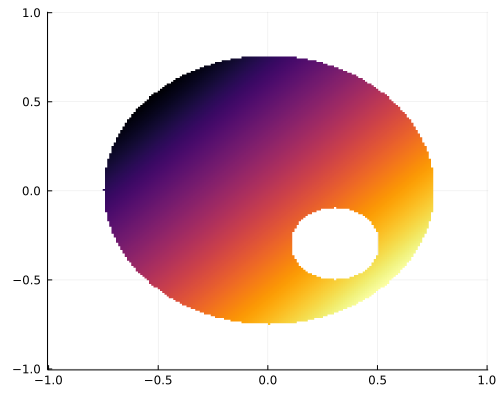

In [34]:
heatmap(F2D)

# Homogenous Neumann on semi-periodic strip (Poisson)

$$\begin{align}
\Delta p(x,y)&=f(x,y) &(x,y)\in\Omega\\
\frac{\delta p}{\delta y}(x,y) &= 0 &(x,y)\in\delta\Omega
\end{align}$$

In [35]:
B2 = (Fourier(21) → -1..1)^2
D2 = cube([-1.0,-0.5],[1.0,0.5])

(-1.0..1.0) × (-0.5..0.5)

In [37]:
diff2 = differentiation(B2,(0,1))
df2N = (x,y)->0;
BC2 = NeumannBC(df2N,DomainSets.euclideanspace(Val(2)))

NeumannBC(var"#39#40"(), {x} (full space))

In [38]:
f2N = (x,y)->cos(2*pi*(x+y));
Diff2 = differentiation(B2,(2,0))+differentiation(B2,(0,2))
DE2 = DiffEquation(B2,D2,Diff2,f2N, (BC2,));

In [39]:
F2N = solve(DE2,solverstyle=AZStyle())

A 2-dimensional Expansion with 441 degrees of freedom.
Basis: ExtensionFrame{Float64, ComplexF64, BasisFunctions.MappedFourier{Float64}, ClosedInterval{Float64}}(-1.0..1.0, BasisFunctions.MappedFourier{Float64}(Fourier(21), x -> 2.0 * x - 1.0)) ⊗ ExtensionFrame{Float64, ComplexF64, BasisFunctions.MappedFourier{Float64}, ClosedInterval{Float64}}(-0.5..0.5, BasisFunctions.MappedFourier{Float64}(Fourier(21), x -> 2.0 * x - 1.0))


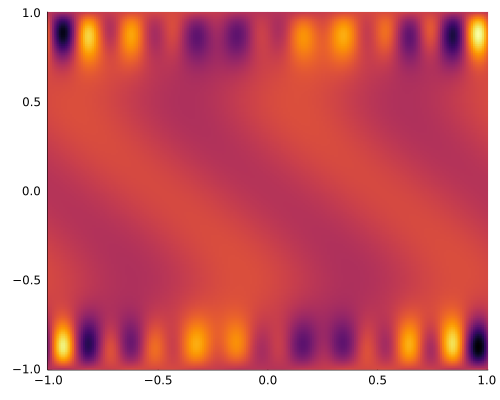

In [40]:
heatmap(F2N)

## Helmholtz

In [51]:
using StaticArrays
B2 = (Fourier(41) → -1..1)^2
D2 = disk(0.75)\disk(0.2,SVector(0.3,-0.3))

Ball(0.75, [0.0, 0.0]) \ Ball(0.2, [0.3, -0.3])

In [52]:
diff2 = IdentityOperator(B2)
df2H = (x,y)->0;
BC = NeumannBC(df2H,DomainSets.euclideanspace(Val(2)))

NeumannBC(var"#51#52"(), {x} (full space))

In [53]:
f2H = (x,y)->exp(-200*((x+0.3)^2+(y-0.3)^2))
Diff2 = differentiation(B2,(2,0))+differentiation(B2,(0,2))+1000*IdentityOperator(B2)
DE2 = DiffEquation(B2,D2,Diff2,f2H, (BC2,));

In [54]:
F2H = FrameFun.solve(DE2,solverstyle=AZStyle())

A 2-dimensional Expansion with 1681 degrees of freedom.
Basis: ExtensionFrame{SVector{2, Float64}, ComplexF64, BasisFunctions.TupleProductDict{2, Tuple{BasisFunctions.MappedFourier{Float64}, BasisFunctions.MappedFourier{Float64}}, SVector{2, Float64}, ComplexF64}, SetdiffDomain{SVector{2, Float64}, Tuple{DomainSets.GenericBall{SVector{2, Float64}, :closed, Float64}, DomainSets.GenericBall{SVector{2, Float64}, :closed, Float64}}}}(Ball(0.75, [0.0, 0.0]) \ Ball(0.2, [0.3, -0.3]), (BasisFunctions.MappedFourier{Float64}(Fourier(41), x -> 2.0 * x - 1.0)) ⊗ (BasisFunctions.MappedFourier{Float64}(Fourier(41), x -> 2.0 * x - 1.0)))


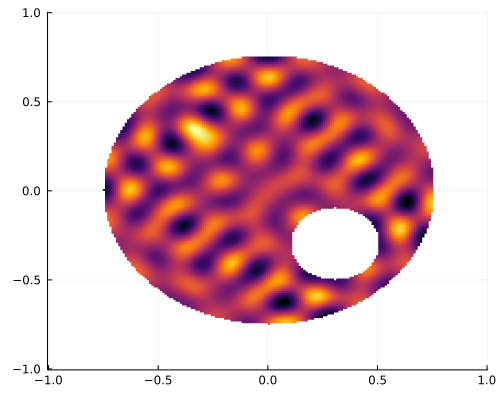

In [55]:
heatmap(F2H)